# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


In [12]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# Linear regression is fitting your data to a line (think like, y = mx + b). Polynomial is more "shapeable" and is in the
# form y = ax + bx^2 + cx^3 ..... zx^n.  Note if it's too high of a dregree you can overfit. You can make models to make
# predictions on your line.


# Overfitting is when you "memorize" your training set by fitting too well to it. Your model captures the noise in your data
# which actually results in a worse overall model that doesn't predict well with your testing set.
# See image: http://www.frank-dieterle.de/phd/images/image024.gif

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

In [13]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# Logistic regression takes a value and spits out a value that you can round to 0 to 1. Good for binary classification.

# Support Vector Machines: help you cluster and classify data by expanding them splitting them in euclidean space
# Vectors: Each point is represented by a vector (think of MATH 133 linalg) and you perform transformations on those vect.
# Margin: You want to maximize the margin on either side of your splitting vector or plane. There's a tradeoff between
#           large margin and number of mistakes in training.
# Slack Variables: Related to margin. Depending on value, softens the borders to determine between margin violations 
#           and mistakes in classification
# Kernels: Math tools that expand your datapoints into a greater dimensional space so you can split them easier (see ex)

# Ex: http://i2.wp.com/blog.hackerearth.com/wp-content/uploads/2017/02/kernel.png?resize=730%2C291

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- Explain the "training" and "testing" phase of a k-NN model. List out the key steps.
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

In [14]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

#	- Supervised: regression vs classification
#		○ Continuous output (ex: predicting sales price) vs categories (cats vs dogs).
#	- Unsupervised: 
#		○ Learn patterns within outputs using CLUSTERING and math (you can define similarity based on what you want)
#		○ Ex: imaging. Like colours or medical imaging (like brain tissue pixels vs brain tumour pixels)


# K-NN relies on classification based on on the class of the nearest neighbours. It does not really have a "model" to train.
# For testing make sure to use K-cross validation because the neighbours are pretty damn important for this type of
# classification (so you have the appropriate density of the points in the different classes)

# K-NN needs a lot of points, so a dataset with not a lot of points would need SVM
# Ex: this would work BETTER with SVM : https://eight2late.files.wordpress.com/2016/12/svm-fig-1.png

# K-NN is good for multi class but SVM not so much (you have to change it a bunch)
# Ex: good for K-NN: https://i.stack.imgur.com/Y4gxj.png


### 4) k-NN Implementation
- Implement the "training" phase of a k-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [24]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import math

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()
from sklearn.utils import shuffle
iris_df = shuffle(iris_df)
print(iris_df)


## YOUR CODE HERE
trainingSet = pd.DataFrame()
testSet = pd.DataFrame()
trainingSet, testSet = iris_df[:100, :], iris_df[100:, :] # I chose a 2/3 split


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

########### TBH BEYOND THIS IM STUCK SO HERE'S THE CLEAREST ONE FROM ONE OF THE VARIOUS TUTORIALS I FOUND ###########
##### SO I KNOW FOR THIS MODEL IT TAKES THE EUCLIDEAN DISTANCE
##### FROM NEIGHBOURS AND GETS CONSENSUS BASED ON THEIR CLASS (TAKES VOTES) TO GUESS WHAT THE CLASS OF IT IS AS WELL
##### AND MAKE OUR PREDICTIONS, WHICH WE CAN LATER CHECK FOR ACCURACY. BUT I THINK THE ROUGH PART IS THAT I DONT KNOW
##### WHAT INFORMATION (IE DATA AND TARGETS) TO SEND WHERE AND WHEN.

import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


# This function makes a lot of sense
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


######### HERE WE CALL OUR FUNCTIONS TO ACTUALLY USE THEM
# Generate predictions

predictions=[]
k = 3

for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet['data'], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet['data'][-1]))
    

accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   
14                 5.8               4.0                1.2               0.2   
82                 5.8               2.7                3.9               1.2   
128                6.4               2.8                5.6               2.1   
29                 4.7               3.2                1.6               0.2   
53                 5.5               2.3                4.0               1.3   
85                 6.0               3.4                4.5               1.6   
143                6.8               3.2                5.9               2.3   
75                 6.6               3.0                4.4               1.4   
108                6.7               2.5                5.8               1.8   
132                6.4               2.8                5.6               2.2   
81                 5.5      

TypeError: unhashable type: 'slice'

### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

In [ ]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# Bagging and boosting enhance performance. Bagging is adding more "levels/decisions" of equal weights whereas
# Boosting changes the weights of certain predictors. Ex: Bagging is adding more trees in an RCF while boosting is
# like using gradient boosting in tree classifiers

# Decision tree is a single graph that uses features to decide final class
# Forest is a bunch of trees that vote what class they think and the majority rules to classify (or a more complex merge)

# Decision tree pros: easier to implement, good for combos of numerical and categorical data, easy to visualize
# cons: can overfit if very complex but no if not,

# RF pros: Usually better performance
# cons: Can overfit, slower, harder to implement

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

In [18]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# PCA uses eigenvales where the projection of the data onto the eigenvector has the largest variance (spread)
# to determine the most important distinguishing features (by selecting largest eigenvalues) to later reduce dimensionality.
# We have to subtract mean to have the mean at 0,0. With the whitened data, you can use a formula to compute the
# covariance matrix so it's a much simpler formula.
# Also, from a conceptual side, your variance is defined by your variance from the mean.

# autoencoders use hidden vector nodes and a bottleneck to reduce dimensionality. Performs well when you add noise
# to dataset so it can learn what's actually important. Ignore noise more.
# Basically autoencoders can be thought of more capable PCA where it can learn
# non-linear manifolds (continuous, non intersecting lines)

# if your autoencoder uses linear transforms (as opposed to non linear) it's basically a PCA at that point

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [2]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Training accuracy:  0.6356589147286822


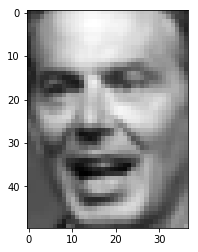

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###

pca = PCA(n_components=100)
pca.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


RFC = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_features = 50)
RFC.fit(X_train, y_train)

print("Training accuracy: ",accuracy_score(RFC.predict(X_test), y_test))


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

